## Project Topic : Pokemon Analysis

## Project Topic : Initial Description
- This project will be for a classification problem
- I will be performing a logistic regression and KNN based on the stats of individual pokemon and build models to determine whether a Pokemon is considered a "Legendary" and which non-legendary pokemon should really be viewed as legendary

## Project Topic : Background Knowledge

### What is Pokemon?
- Pokemon is a videogame and tv series based on the concept of fictional creatures called Pokemon
- In the series humans known as Pokemon Trainers, catch and train Pokemon to battle each other and prove that they are the best
- In the videogames every Pokemon has its own stats representing speed, health, attack, defense, and more
- Every Pokemon also has 1 or 2 types such as fire, water, grass etc. with ever type being strong against others, and every type being weak to others (eg. Fire types are weak to Water types but strong against Grass types)
- Pokemon gain experience through battling each other and gain levels that allow them to increase their stats and become more powerful with some "evolving" into a stronger form when they reach a certain level of experience 
- The Pokemon games have gotten bigger and bigger in file size with each generation (group) of games releaed with the first generation of games released in 1998 with a size of 10 mb to the latest generation released in November of 2022 with a size of 10 gb</br>

### What are Legendary Pokemon?
- Some Pokemon are incredibly rare and significantly more powerful than others, commonly referred to as "Legendary Pokemon"
- These legendary pokemon usually have a mythical backstory that ties into the main story of the game and the Pokemon world itself
- Often times these pokemon will be harder to catch, harder to find, and are special and unique
- Usually only 1 of each legendary Pokemon is available in a given game meaning you can only catch 1 of each legendary Pokemon 
- Legendary Pokemon are generally considered stronger and are more often sought after by trainers or players of the videogames to include them in their Pokemon teams
- These Pokemon can be so strong that the number of them that people are allowed to use in competition is often 
- Interestingly there is no official in-game criteria that indicates a Legendary Pokemon. That distinction is made through official statements in the media.

### What are Pseudo-legendary Pokemon?
- Every generation of videogame releases there are also a few Pokemon released that are considered pseudo-legendaries
- These pokemon are NOT legendary pokemon
- Multiple of these can be caught in the wild in every game although they are still difficult to obtain
- All pseudo-legendaries are very powerful and usually come right next to the legendaries in sequential ordering
- This is a fan-made term to recognize the extremely powerful pokemon in every generation

## Project Topic : Goal and Motivation
- The goal of this problem is to determine whether a pokemon would be classified as a legendary or a non-legendary
- The motivation behind this project is to discover which non-legendary pokemon should be considered legendary. There are a few which fans of the series would expect as pseudo-legendaries but I am curious which non-legendary pokmeon the model predicts to be legendary.

### Data Source and Citation
- The data was sourced from kaggle https://www.kaggle.com/datasets/abcsds/pokemon
- The data was initially generated from a scrape pokemon.com, pokemondb, and bublapedia
- O'Neill, G. (2022) Video Game Sales. Retrieved November 2, 2012 from https://www.kaggle.com/datasets/abcsds/pokemon.

### Dataset : Pokemon with Stats
Dataset Size
- The dataset contains 13 different columns
- The dataset contains 800 rows of different pokemon


### Important to note about the different stats : Physical vs. Special
- After generation 2 the Pokemon company decided to revisit every individual pokemon creature and split the physical and special stats of pokemon
- Pokemon were assigned a special attack stat, a physical attack stat, a special defense stat and a physical defense stat instead of the previous case where pokemon had an attack, defense, and special stat
- Most importantly, every attack that a pokemon could use was divided into one of two categories Physical or Special
- Specifically they gave some attacks like punches, kicks, bites a physical typing
    - These Physical Attacks would use the Attack stat of the Attacking Pokemon, calculated against the Defense Stat of the Defending Pokemon
- Conversley they gave some attacks like thunderbolts, flamethrowers, and energy beams a special typing
    - These Special Attacks would use the Special Attack stat of the attacking Pokemon, against the Special Defense Stat of the Defending Pokemon
    
### This dataset contains the following variables
- Pokedex index number, a unique integer index value representing the index of the Pokemon in the game's database the Pokedex
- Name, a string, The name of the pokemon
- Type 1, a string, The primary type of a pokemon
- Type 2, a string, The secondary type of a pokemon, not all pokemon have a secondary typing
- Total, an integer, The sum of the pokemon's stats
- HP, an integer, The health stat of the pokemon
- Attack, an integer, The attack stat of the pokemon
- Defense, an integer, The defense stat of the pokemon
- Special Attack, an integer, The special attack stat of the pokemon
- Special Defense, an integer, The special defense stat of the pokemon
- Speed, an integer, The speed stat of the pokemon
- Generation, an integer, The generation of games that the pokemon was released in, every Pokemon game belongs to a generation with each generation of games sharing a map, similar gameplay mechanics and the same set of Pokemon.
- Legendary, a boolean, This indicates whether a pokemon is classified as a legendary or not

## Data Cleaning
- Note : As I am not concerned about the actual individual names of the Pokemon in my dataset, spelling will not matter
- Lets start by importing the required libraries and getting an overview of the dataset

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures as pf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import patsy
import sklearn
import sklearn.metrics as metrics
import sklearn.neighbors
import seaborn as sns

In [2]:
pkmn_data = pd.read_csv("Pokemon.csv")
pkmn_data.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


- First lets check null values in each column to see if there are any records we need to remove due to missing information, I expect there to be missing values in the Type 2 column as not all pokemon have secondary typings
- Other than the Type 2 column I do not expect any missing values, thus if I see any below then there is a problem

In [3]:
#check null totals
pkmn_data.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

- It looks like the data is good to go on that front, I don't see any unexpected missing values

### Data Cleaning : Errors in the data
- There were a few pokemon that were mistakenly labeled as non legendaries that are actually legendary, this is a mistake 
- Namely Mew, Celebi, Cresselia, Manaphy, Genesct, Keldeo, Keldeo, and Meloetta Aria Forme are all legendary pokemon but are incorrectly labeled as non-legendary within the dataset, to fix this I will change the legendary status of these Pokemon to true

In [4]:
#change legendary status to true for select pokmeon
pkmn_data.loc[pkmn_data["Name"] == "Mew", "Legendary"] = True
pkmn_data.loc[pkmn_data["Name"] == "Celebi", "Legendary"] = True
pkmn_data.loc[pkmn_data["Name"] == "Cresselia", "Legendary"] = True
pkmn_data.loc[pkmn_data["Name"] == "Manaphy", "Legendary"] = True
pkmn_data.loc[pkmn_data["Name"] == "Genesect", "Legendary"] = True
pkmn_data.loc[pkmn_data["Name"] == "MeloettaAria Forme", "Legendary"] = True
pkmn_data.loc[pkmn_data["Name"] == "KeldeoResolute Forme", "Legendary"] = True
pkmn_data.loc[pkmn_data["Name"] == "KeldeoOrdinary Forme", "Legendary"] = True

### Data Cleaning : Removal of Duplicates true duplicates
- First I will check for true duplicate rows in the dataframe and then I will address special cases that are represented as duplicates


In [5]:
boolean = pkmn_data.duplicated(subset=['Name']).any()
boolean

False

- It looks like there aren't any dupilcate rows in my dataset so that check passes

### Data Cleaning : Removal of Duplicates, special cases
- This required a little inside knowledge about pokemon but is a part of the data cleaning that I feel necessary
- In Pokemon there are certain special cases that are really duplicates of the same Pokemon but are entered as different entities in the dataset. These special cases which will be described are Mega Pokemon, Primal Pokemon, Therian Forms, and a unique case of the pokemon "Meloetta"
- Megapokemon are special mechanic that was introduced in the middle of the series. When a pokemon "mega-evolves" it gains stats, possibly a secondary typing but its status as a legendary will not change. Further this megapokemon is still considered the same pokemon, thus I've decided to remove all mega pokemon from our dataset as they would be something different entirely to deal with
- Primal Pokemon follow the same logic as mega pokemon but for two special cases of pokemon that are already legendary. Specifically Groudon and Kyogre, for the same reason as mega pokemon we will remove those records
- There was a group of pokemon introduced that were able to switch forms. These pokemon do not lose or gain legendary status and have the same base stat totals. Because these pokemon are considered the same pokemon just in a different form I will remove all of the "therian" or transformed forms
- Meloetta is another specific case for a pokemon that can transform but does not change its legendary status or base stat totals, as such I've decided to remove one of its Pirouette form

In [6]:
no_megas = pkmn_data[pkmn_data["Name"].str.contains("Mega")==False]
no_primals = no_megas[no_megas["Name"].str.contains("Primal")==False]
no_therian = no_primals[no_primals["Name"].str.contains("Therian")==False]
no_pirouette = no_therian[no_therian["Name"].str.contains("Pirouette")==False]
no_pirouette.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,1,False


In [7]:
no_pirouette.shape

(745, 13)

- Our new dataframe that we will be analyzing contains the records for 745 pokemon lets just rename it for future use

In [8]:
pkmn = no_pirouette

# Exploratory Data Analysis

### Exploratory Data Analysis : Pokemon per Generation
- Lets start by taking a look at how the total number of pokemon are split by each generation and how many legendaries are in each generation.
- By doing so I hope to learn whether there is a trend in the total number of legendaries in each generation

In [9]:
pkmn_per_gen = pkmn.groupby(by='Generation')['Legendary'].count()
pkmn_per_gen

Generation
1    151
2     99
3    138
4    116
5    160
6     81
Name: Legendary, dtype: int64

- Now lets visualize those numbers

<AxesSubplot:xlabel='Generation'>

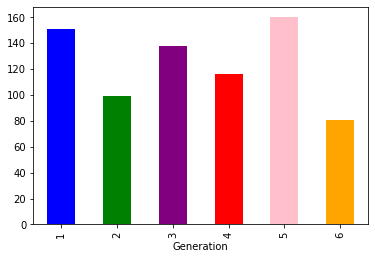

In [10]:
pkmn_per_gen.plot(kind='bar', color=['blue', 'green', 'purple', 'red', 'pink', 'orange'])

- We can see that generations 6 and 2 have the fewest total pokemon but the other generations have roughly the same number

In [11]:
legendaries_per_gen = pkmn.groupby(by='Generation')['Legendary'].sum()
legendaries_per_gen

Generation
1     5
2     6
3    13
4    15
5    16
6     7
Name: Legendary, dtype: int64

<AxesSubplot:xlabel='Generation'>

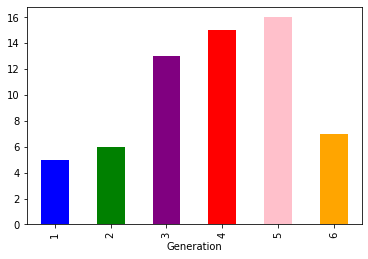

In [12]:
legendaries_per_gen.plot(kind='bar', color=['blue', 'green', 'purple', 'red', 'pink', 'orange'])

- We can see that generations 3,4,5 have by far the most legendary pokemon. 
- Generations 1,2,6 have relatively few legendaries, I somewhat expected this from generation 6 as it had the fewest number of overall Pokemon but not from generation 1 which had the 2nd most pokemon
- Whats really important here is that there isn't a clear trend of more or less legendary pokemon as the generation progressed

### Exploratory Data Analysis : Proportion of Legendary Pokemon
- Lets consider Class Imbalance
- If there are too many Pokemon that are non-legendary it could be a problem


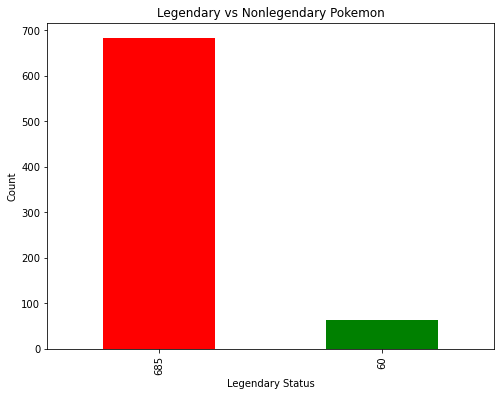

Proportion of Legendary Pokemon :  8.053691275167784 %


In [13]:
legend_plot = pkmn['Legendary'].value_counts()
xlabels = [685, 60]
plt.figure(figsize=(8, 6))
ax = legend_plot.plot(kind='bar', color=['r', 'g'])
ax.set_title("Legendary vs Nonlegendary Pokemon")
ax.set_xlabel("Legendary Status")
ax.set_ylabel("Count")
ax.set_xticklabels(xlabels)
plt.show()
print("Proportion of Legendary Pokemon : ", (60/(60+685))*100, "%")

- It looks like roughly 8% of all Pokemon are considered legendary, with the minority class having a 2:25 ratio I don't see a particular issue for class imbalance but I'll definitely keep an eye on it

### Exploratory Data Analysis : What is are 'best' and 'worst' legendaries?
- Legendary Pokemon in general have higher stat totals than non-legendary pokemon
- Which legendary Pokemon has the lowest stat total and which legendary had the highest stat total

In [14]:
legendary_pkmn = pkmn[pkmn["Legendary"]]
worst_legendary = legendary_pkmn[legendary_pkmn['Total']==legendary_pkmn['Total'].min()]
worst_legendary

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
262,243,Raikou,Electric,NaN,580,90,85,75,115,100,115,2,True
263,244,Entei,Fire,NaN,580,115,115,85,90,75,100,2,True
264,245,Suicune,Water,NaN,580,100,75,115,90,115,85,2,True
414,377,Regirock,Rock,NaN,580,80,100,200,50,100,50,3,True
415,378,Regice,Ice,NaN,580,80,50,100,100,200,50,3,True
416,379,Registeel,Steel,NaN,580,80,75,150,75,150,50,3,True
537,480,Uxie,Psychic,NaN,580,75,75,130,75,130,95,4,True


- It looks like the lowest stat total for legendary pokemon is 580 and that there are alot of pokemon with 580 total base stats
- Now lets find the best legendaries

In [15]:
best_legendary = legendary_pkmn[legendary_pkmn['Total']==legendary_pkmn['Total'].max()]
best_legendary

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
552,493,Arceus,Normal,NaN,720,120,120,120,120,120,120,4,True


- It looks like there is only one legendary with the highest stat total, Arceus
- Upon further investiagation it looks like this pokemon is considered the "God" of pokemon, somewhat fitting that it has the highest stat total then

### Exploratory Data Analysis : What are the "best" and "worst" non-legendaries?
- Now that I've taken a look at which legendary pokemon have the highest and lowest stat totals lets take at the best and worst non-legendary pokemon

In [16]:
non_legendary_pkmn = pkmn[~pkmn["Legendary"]]
worst_non_legendary = non_legendary_pkmn[non_legendary_pkmn['Total']==non_legendary_pkmn['Total'].min()]
worst_non_legendary

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
206,191,Sunkern,Grass,NaN,180,30,30,30,30,30,30,2,False


- It looks like Sunkern has the lowest base stat totals of any pokemon at 180 and thats waaay lower than legendaries

In [17]:
best_non_legendary = non_legendary_pkmn[non_legendary_pkmn['Total']==non_legendary_pkmn['Total'].max()]
best_non_legendary

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
313,289,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False


- It looks like Slaking has the highest stat total of all non-legendary pokemon at 670
- Interestingly this is much higher than alot of legendary pokemon who we saw had a stat total of 580
- Lets get a look at all non-legendary pokemon that have a stat total greater than 580 the miminum number for legendary pokemon

In [18]:
pseudo_legendaries = non_legendary_pkmn[non_legendary_pkmn.Total > 580]
pseudo_legendaries

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
161,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,1,False
267,248,Tyranitar,Rock,Dark,600,100,134,110,95,100,61,2,False
313,289,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False
408,373,Salamence,Dragon,Flying,600,95,135,80,110,80,100,3,False
412,376,Metagross,Steel,Psychic,600,80,135,130,95,90,70,3,False
493,445,Garchomp,Dragon,Ground,600,108,130,95,80,85,102,4,False
696,635,Hydreigon,Dark,Dragon,600,92,105,90,125,90,98,5,False
776,706,Goodra,Dragon,NaN,600,90,100,70,110,150,80,6,False


### Pseudo-legendaries
- These pokemon are commonly referred to by fans as pseudo-legendaries (non official term) 
- What I find really interesting is that the only pseudo legendary with a base stat total above 600 is slaking and it is at 670 which is significantly greater
- A little background knowledge, upon further investigation Slaking has an ability that limits it to making a move once every two turns, with such a a drawback it makes more sense why it has a higher base stat total than other pseudo-legendaries, when building my model I'll consider removing Slaking as it is an outlier and I feel like its ability impacts the meaningfullness of its stats and thus its stats are not fully indicative of it as a Pokemon
- Later we will compare the results of our model predictions to this list and check to see the differences

### Exploratory Data Analysis : How do the Types split among legendaries and non-legendaries?

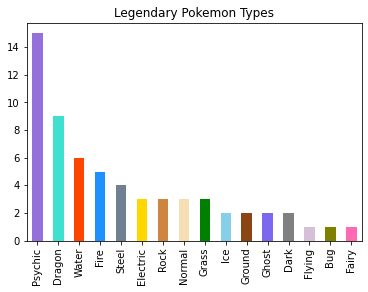

In [19]:
type_colours_l = ['mediumpurple', 'turquoise', 'orangered', 'dodgerblue', 'slategrey', 'gold', 'peru', 'wheat', 'green', 'skyblue', 'saddlebrown', 'mediumslateblue', 'grey', 'thistle', 'olive', 'hotpink']
#legendary_types = legendary_pkmn.groupby(by="Type 1").count()
#plt.pie(legendary_types.Legendary, labels = type_labels_l, colors = type_colours_l)
legendary_pkmn['Type 1'].value_counts().plot(kind='bar', color = type_colours_l)
plt.style.use('dark_background')
plt.title("Legendary Pokemon Types")
plt.show()

- Interestingly here if we look at the legendary chart we can see that the majority of the legendary pokemon are either psychic types or dragon types lets see how that compares to non legendaries

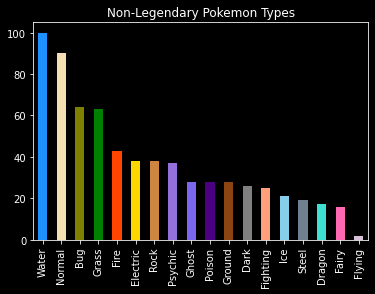

In [20]:
type_colours = ['dodgerblue', 'wheat', 'olive', 'green', 'orangered', 'gold', 'peru', 'mediumpurple', 'mediumslateblue',
                'Indigo', 'saddlebrown', 'grey', 'lightsalmon', 'skyblue', 'slategrey', 'turquoise', 'hotpink', 'thistle']
non_legendary_types = non_legendary_pkmn.groupby(by="Type 1").count()
non_legendary_pkmn['Type 1'].value_counts().plot(kind='bar', color = type_colours)
plt.title("Non-Legendary Pokemon Types")
plt.style.use('dark_background')
plt.show()

- Ok a big difference compared to the legendary chart
- Here psychic types are right in the middle and dragon types are a very small sliver of the chart
- The largest portions are Water and Normal by far then followed by Bug and Grass
- Interestingly Poison and Fighting Types are present here when there were no Poison or Fighting type legendaries

### Exploratory Data Analysis : How do the Stats Correlate?
- In Pokemon generally the different pokemon are designed with a purpose in mind by the game creators
- There are bulkier pokemon with high defenses, and frailer pokemon with higher attack stats
- Lets build a correlation matrix to investigate this further
- Before we do so lets drop the information that isn't as relevant such as pokedex number '#', Total Stats 'Total', and Release Generation 'Generation'

In [21]:
pkmn_corr = pkmn.drop(columns=['#', 'Total', 'Generation'])
pkmn_corr_matrix = pkmn_corr.corr()
pkmn_corr_matrix.style.background_gradient(cmap='coolwarm')

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
HP,1.000000,0.424627,0.225520,0.364928,0.368845,0.166232,0.296123
Attack,0.424627,1.000000,0.402556,0.358214,0.194554,0.341483,0.333934
Defense,0.225520,0.402556,1.000000,0.195034,0.499445,0.001769,0.283776
Sp. Atk,0.364928,0.358214,0.195034,1.000000,0.483639,0.454167,0.460536
Sp. Def,0.368845,0.194554,0.499445,0.483639,1.000000,0.234716,0.389430
Speed,0.166232,0.341483,0.001769,0.454167,0.234716,1.000000,0.347775
Legendary,0.296123,0.333934,0.283776,0.460536,0.389430,0.347775,1.000000


- Alright lets examine this correlation matrix and see what we can learn from it
- It looks like the most closely correlated pairs of stats are Special Defense and Defense, followed by Special Attack and Special Defense, and then Special Attack and Speed
    - Special Defense and Defense makes sense to be highly correlated. The high correlation represents an overall defensive pokemon.
    - Special Attack and Special Defense being correlated was somewhat surprising to me but it represents a non physical pokemon 
    - Special Attack and Speed was a pairing I expect it represents a fast special attacking pokemon, having a background with these games this is extremely common as some early Electric Type Pokemon would use Special Attacks but be really fast, a common theme
- Conversley, the least correlated pairs of stats are Defense and Speed, HP and Speed, and then Special Defense and Attack
    - Defense and Speed being not at all correlated makes sense, a fast defensive pokemon wouldn't have as much use in the game as a fast attacking pokemon
    - HP and Speed not being highly correlated also makes sense as a bulky pokemon that always went first would generally be considered overpowered and hard to defeat
    - Special Defense and Attack not being highly correlated was surprising but makes sense, this would have to do with the split betwee special and physical. Specially Defensive pokemon not having as high a correlation with physical attacks as they do special attacks makes sense
- Next lets consider the stats that have the highest correlation with the legendary status. It looks like Special Attack, Special Defense, Attack and Speed have the highest correlation
    - This makes some sense to me, as we learned earlier the Psychic Type has the most legendaries of any type and the psychic type is generally a Special type. Thus the high special attack, and special defense makes sense
    - The next highest being attack is a little interesting, perhaps offensive legendaries are more overall common than defensive legendaries
 
 - Now lets take a look at a correlation matrix of just legendary pokemon and see if we have a noticeable difference

In [40]:
legendary_pkmn_corr = legendary_pkmn.drop(columns=['#', 'Total', 'Generation', 'Legendary'])
legendary_pkmn_corr_matrix = legendary_pkmn_corr.corr()
legendary_pkmn_corr_matrix.style.background_gradient(cmap='coolwarm')

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.138402,0.099209,-0.005198,0.044825,-0.162008
Attack,0.138402,1.000000,-0.313292,0.443359,-0.493053,0.224511
Defense,0.099209,-0.313292,1.000000,-0.652281,0.420403,-0.549719
Sp. Atk,-0.005198,0.443359,-0.652281,1.000000,-0.317205,0.257901
Sp. Def,0.044825,-0.493053,0.420403,-0.317205,1.000000,-0.584378
Speed,-0.162008,0.224511,-0.549719,0.257901,-0.584378,1.000000


- Woah really interesting trends emerged when we looked just at legendaries and their stat correlations
- First the new most highly correlated pairs of stats are Attack and Special Attack, and Defense and Special Defense
    - This was a surprisng change but thinking about legendary pokemon being rarer and more deliberately designed these correlations make some sense
    - The high correlation between Attack and Special Attack represents an offensive Pokemon with an emphasis on attacking and dealing alot of damage, if you look both of these stats also have the highest correlation with the speed stat. This would represent fast, offensive pokemon who hit first and for a lot of damage. A deliberate design choice and a common theme in legendaries.
    - The high correlation between Defense and Special Defense represents a defensive Pokemon with an emphasis on taking a strong attack but not taking a ton of damage from it, if you look at both of these stats they also have a negative correlation with the speed stat. This makes sense, a defensive pokemon who doesn't deal damage wouldn't really benefit from going before others as much as an offensive pokemon would. This would represent a tanky bulky pokemon
- The lowest correlations in this matrix are actually negative : Special Attack and Defense, Defense and Speed, Special Defense and Speed, and Attack and Special Defense
    - We discussed above why Defense and Speed and Special Defense and Speed are negatively Correlated so lets focus here on the other pairings
    - The low correlation between Special Attack and Defense represents the split between special and physical which is somewhat expected. A physically bulky pokemon having a low special attack stat seems standard
    - Similarly the low correlation between Attack and Special Defense is expected as well. A specially bulky pokemon having a low physical attack stat is standard as well

## Model Approach

### Model Approach : Logistic Regression and KNN
- I've chosen to analyze this data using Logistic Regression and KNN
- As I have one dependent variable (the legendary status) and several continuous predictor variables (stats) this seemed like the logical choice
- This should allow me to create a model that predicts legendary status using stats rather nicely
- As multiple linear regression determines correlation and not causation this works perfectly as there is no one stat that determines a legendary Pokemon and as we've shown in our analysis of "pseudolegendary" Pokemon, the total stats of some non-legendary pokemon can outweight the total stats of some legendary pokemon


### Model Approach : Potential Problems and How I plan to address them
- I'll need to examine the relationship between my stats to determine if I'll have issues with Collinearity. If two stats are too highly correlated "Attack and Special Attack for example" then I'll need to address this
    - Using the physical special split I described earlier as well as the information from my correlation matrix I should be able to determine whether I need to combine some of these stats back into their original form of physical and special
    - This will be a big one for me to address
- There are some cases where Pokemon with high stat totals such as the pseudo-legendaries described earlier may prove to be Outliers or High Leverage, I'll need to keep an eye on this
    - I've already made an important note of the Pokemon Slaking which has an exceptionally high stat total even for a pseudo-legendary pokemon and thus I'm already considering its removal. This is especially important as its ability makes it significantly weaker having it only attack once every two turns. This may lead to the stats of slaking throwing off my model as they aren't very representative for pokemon overall. Slaking I consider an outlier as it is not a legendary but has a very high stat total. I'll need to see how my model performs with and without slaking
- I'll need to examine the error rate and accuracy as the K changes for my KNN models
    - This should be easy enough to plot

### Models : Final Data Preparations
There are a few changes that I still want to make to my dataset that I think will help the model
- To begin I'm going to rename the Sp. Atk and Sp.Def columns to make them easier to work with
- As I had previously discussed the pokemon "Slaking" has a special ability that prevents it from acting every other turn. This changes how its stats interact with the game and as I have no way reflect that in my model I will be dropping that observation
- Next I'll be dropping the #, Name, Type 1, Type 2, and Generation Columns as I won't be using them in my model
- All stats are not necessarily on the same range so I've decided to normalize the stats



In [23]:
pkmn_model = pkmn
pkmn_model = pkmn_model.rename(columns={"Sp. Atk" : "Sp_Atk", "Sp. Def" : "Sp_Def"})
pkmn_model = pkmn_model[pkmn_model["Name"].str.contains("Slaking")==False]
pseudo_set = pkmn_model.copy()
pkmn_model = pkmn_model.drop(['#','Name', 'Type 1', 'Type 2', 'Generation', 'Total'], axis=1)
cols = pkmn_model.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(pkmn_model)
pkmn_normalized = pd.DataFrame(np_scaled, columns=cols)
pkmn_model = pkmn_normalized

### Model : Training and Testing Split
- I've decided to do an even odds split in my data for the training and testing split
- The reason I've chosen this and not to do a random split is because legendary pokemon often follow one another sequentially, thus choosing randomly could lead to some class imbalance issues when trying to make my model

In [24]:
pkmn_x = pkmn_model.drop("Legendary", axis=1)
pkmn_y = pkmn_model['Legendary']
pkmn_train_x = pkmn_x[::2]
pkmn_train_y = pkmn_y[::2]
pkmn_test_x = pkmn_x[1::2]
pkmn_test_y = pkmn_y[1::2]
print("X training set shape: ", pkmn_train_x.shape)
print("Y training set shape: ", pkmn_train_y.shape)
print("X training set shape: ", pkmn_test_x.shape)
print("Y training set shape: ", pkmn_test_y.shape)

X training set shape:  (372, 6)
Y training set shape:  (372,)
X training set shape:  (372, 6)
Y training set shape:  (372,)


### Model : Logistic Regression Model
Here we are going to fit and test a few different logistic models
- First we are going to try using Sklearn's logistic regression model
- Then we are going to try the smf logit regression
- Next we are going to test some interaction terms with our model

In [25]:
lr_pkmn = LogisticRegression(solver='lbfgs', max_iter=1000)
ypkmn1, Xpkmn1 = patsy.dmatrices("C(Legendary, [[0], [1]]) ~ 0 + HP*Attack*Defense*Sp_Atk*Sp_Def*Speed", data=pkmn_model)
legendary_model_lr = lr_pkmn.fit(pkmn_train_x, pkmn_train_y)
legendary_prediction_lr = legendary_model_lr.predict(pkmn_test_x)
legendary_model_cm = metrics.confusion_matrix(pkmn_test_y, legendary_prediction_lr)


Accuracy for Logistic Regression Model:  0.9301075268817204


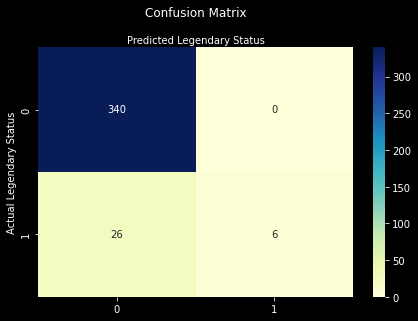

In [26]:
class_names = ["Non-Legendary", "Legendary"]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(legendary_model_cm), cmap="YlGnBu", annot=True, fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Actual Legendary Status")
plt.xlabel("Predicted Legendary Status")
print("Accuracy for Logistic Regression Model: ", legendary_model_lr.score(pkmn_test_x, pkmn_test_y))

In [27]:
pkmn_model2 = pkmn_model
pkmn_model2["Legendary"] = pkmn_model2["Legendary"].astype(int)
pkmn_train2 = pkmn_model2[::2]
pkmn_test2 = pkmn_model2[1::2]
log_reg = smf.logit("Legendary ~ HP + Attack + Sp_Atk + Sp_Def + Defense + Speed", data=pkmn_train2).fit()
legendary_predictions2 = log_reg.predict(pkmn_test2)
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.014225
         Iterations 16
                           Logit Regression Results                           
Dep. Variable:              Legendary   No. Observations:                  372
Model:                          Logit   Df Residuals:                      365
Method:                           MLE   Df Model:                            6
Date:                Tue, 13 Dec 2022   Pseudo R-squ.:                  0.9493
Time:                        04:33:07   Log-Likelihood:                -5.2915
converged:                       True   LL-Null:                       -104.29
Covariance Type:            nonrobust   LLR p-value:                 5.078e-40
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -172.7100     96.533     -1.789      0.074    -361.911      16.491
HP            72.5793     47

Both of these models look alright with a Adj R-squared of .94 and .90 but lets see if we can do better
- I'm going to try a few different interaction terms that I was curious about during my EDA
- I was curious about the interaction between Sp_Atk and Atk so I'll create an "offensive" interaction term to represent offensive stats
- I also wanted to investigate the interaction between Sp_Def and Def so I'll similarly create a "defensive" interaction term to represent defensive stats
- Lastly I was curious about the interaction between Sp_Atk and Sp_Def so I'll create an interaction term called "special" to check special stats

In [28]:
pkmn_model2['Offensive'] = pkmn_model2['Attack']*pkmn_model2['Sp_Atk']
pkmn_model2['Defensive'] = pkmn_model2['Defense']*pkmn_model2['Sp_Def']
pkmn_model2['Special'] = pkmn_model2['Sp_Atk']*pkmn_model2['Sp_Def']

log_reg = smf.logit("Legendary ~ HP + Attack + Sp_Atk + Sp_Def + Defense + Speed + Offensive + Defensive + Special", data=pkmn_model2).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.024675
         Iterations 15
                           Logit Regression Results                           
Dep. Variable:              Legendary   No. Observations:                  744
Model:                          Logit   Df Residuals:                      734
Method:                           MLE   Df Model:                            9
Date:                Tue, 13 Dec 2022   Pseudo R-squ.:                  0.9140
Time:                        04:33:07   Log-Likelihood:                -18.358
converged:                       True   LL-Null:                       -213.41
Covariance Type:            nonrobust   LLR p-value:                 1.776e-78
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.5986     24.382     -2.690      0.007    -113.387     -17.811
HP            31.3896     12

Based on the P-values of our three interaction terms Offensive, Defensive, and Special; I determine that none of the interaction terms is statistically significant at the alpha = 0.05 significance level thus I will not be incorporating them into my model. When comparing the Adj R squared there also isn't very much improvement in the model.

### Models : KNN
- We will now create a similar model
- This time using the K nearest neighbors algorithm


For k = 2  the accuracy score is:  0.9623655913978495
For k = 3  the accuracy score is:  0.967741935483871
For k = 4  the accuracy score is:  0.956989247311828
For k = 5  the accuracy score is:  0.956989247311828
For k = 6  the accuracy score is:  0.9543010752688172
For k = 7  the accuracy score is:  0.9623655913978495
For k = 8  the accuracy score is:  0.9543010752688172
For k = 9  the accuracy score is:  0.9543010752688172
For k = 10  the accuracy score is:  0.9489247311827957
For k = 11  the accuracy score is:  0.9543010752688172
For k = 12  the accuracy score is:  0.9516129032258065
For k = 13  the accuracy score is:  0.9596774193548387
For k = 14  the accuracy score is:  0.9543010752688172
For k = 15  the accuracy score is:  0.956989247311828
For k = 16  the accuracy score is:  0.9516129032258065
For k = 17  the accuracy score is:  0.9596774193548387
For k = 18  the accuracy score is:  0.956989247311828
For k = 19  the accuracy score is:  0.9596774193548387
For k = 20  the accurac

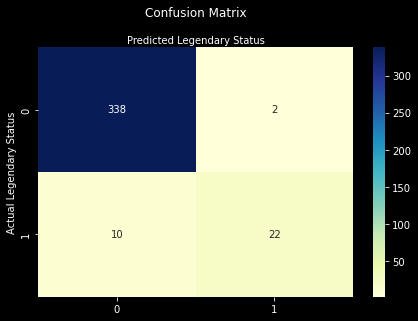

In [29]:
knn = np.arange(2, 42)
cur_k = 0 # used for best k
curMax_accuracy = 0 # used for best accuracy
knn_cm = "" # used for confusion matrix
knn_model = "" # used for best model
error_rates = [] # used to store error rates
accuracy_rates = [] # used to store accuracy
for k in knn:
    #classifier
    clf = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, weights='uniform')
    #model
    fitted = clf.fit(pkmn_train_x, pkmn_train_y.ravel())
    #predictions
    predictions = fitted.predict(pkmn_test_x)
    #accuracy
    accuracy = sklearn.metrics.accuracy_score(predictions, pkmn_test_y)
    #append so we can graph earlier
    error_rates.append(np.mean(predictions != pkmn_test_y))
    accuracy_rates.append(accuracy)
    print("For k =", k, " the accuracy score is: ", accuracy)
    if accuracy > curMax_accuracy:
        # update variables
        curMax_accuracy = accuracy
        cur_k = k
        knn_cm=metrics.confusion_matrix(pkmn_test_y, predictions)
        knn_model = fitted
print("The best k was:", cur_k, "with an accuracy of:", curMax_accuracy)
class_names = ["Non-Legendary", "Legendary"]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(knn_cm), cmap="YlGnBu", annot=True, fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Actual Legendary Status")
plt.xlabel("Predicted Legendary Status")
print("Accuracy for KNN Model: ", knn_model.score(pkmn_test_x, pkmn_test_y))

### Models : Review
A recap of the models we tried
- We tried logistic regression, both using Statsmodels and Sklearn
- We explored interaction terms and found none to be significant
- We tried K nearest neighbors

## Analysis and Results
- First Lets Analyze our models that we came up with
- We will visualize the error and accuracy of our plots with different knn values
- We will compare the different Confusion Matrices of each model
- Next we will view the results of running our models and try to answer our question

## Analysis
- We came up with several different logistic regression models which had Adj R-squared values of .93 and .95 respectively
- We tried several interaction terms with our second logistic model such as Offensive, Defensive and Special, but none proved to be statistically significant
- We tried KNN with many different K values but ultimately got our model with the best accuracy of .97 and a K=3
- Now lets take a look at the error rates and accuracy rates of that KNN model

Minimum error:- 0.03225806451612903 at K = 3


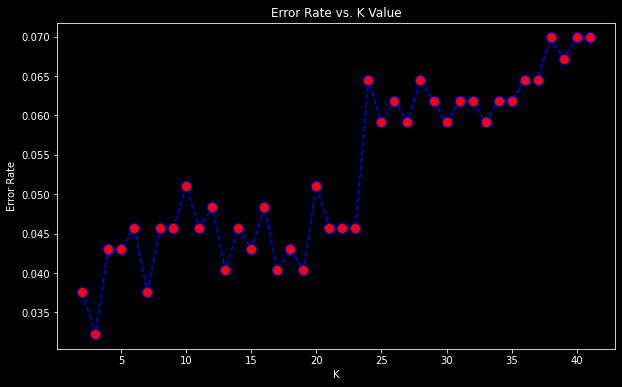

In [30]:

plt.figure(figsize=(10,6))
plt.plot(range(2,42),error_rates,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rates),"at K =",error_rates.index(min(error_rates))+2)

It looks like the minimum error rate occurs at K=3 and the error rate increases from then out

Maximum accuracy:- 0.967741935483871 at K = 3


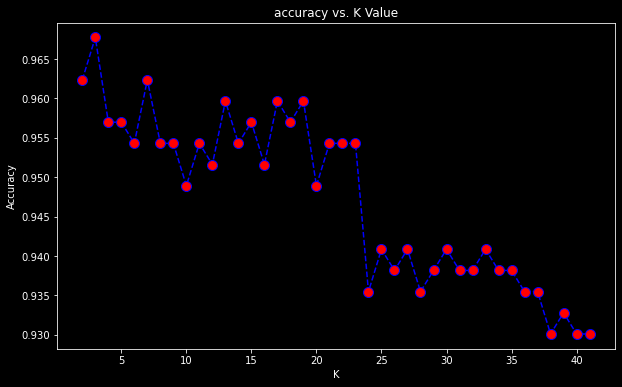

In [31]:
plt.figure(figsize=(10,6))
plt.plot(range(2,42),accuracy_rates,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(accuracy_rates),"at K =",accuracy_rates.index(max(accuracy_rates))+2)

Now lets compare the different Confusion Matrices

Accuracy for Logistic Regression Model:  0.9301075268817204


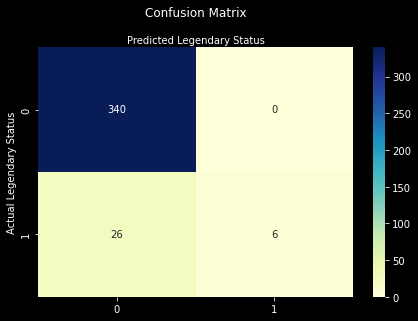

In [32]:
class_names = ["Non-Legendary", "Legendary"]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(legendary_model_cm), cmap="YlGnBu", annot=True, fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Actual Legendary Status")
plt.xlabel("Predicted Legendary Status")
print("Accuracy for Logistic Regression Model: ", legendary_model_lr.score(pkmn_test_x, pkmn_test_y))

Accuracy for KNN Model:  0.967741935483871


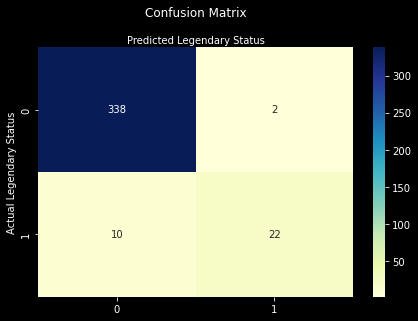

In [33]:
class_names = ["Non-Legendary", "Legendary"]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(knn_cm), cmap="YlGnBu", annot=True, fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion Matrix", y=1.1)
plt.ylabel("Actual Legendary Status")
plt.xlabel("Predicted Legendary Status")
print("Accuracy for KNN Model: ", knn_model.score(pkmn_test_x, pkmn_test_y))

These two are remarkably similar, with roughly the same number of predicted non legendary pokemon correct. Where it gets interesting is that the KNN model predicted many legendary pokmeon correctly when compared to the logistic regression model

### Results
- Now lets answer the ultimate question for our project
- Which pokemon that aren't legendary, should be classified as legendary based on their stats.
- First a recap of the pokemon that are considered by fans as Pseudo-legendaries
- Then the pokmeon that our model predicts to be legendary but aren't
- Lastly we will compare the list of pseudo legendaries to the list of predicted legendaries and observe differences and similarities

In [34]:
print("Pseudo-Legendaries")
print(pseudo_legendaries.Name)

Pseudo-Legendaries
161    Dragonite
267    Tyranitar
313      Slaking
408    Salamence
412    Metagross
493     Garchomp
696    Hydreigon
776       Goodra
Name: Name, dtype: object


In [35]:
non_leg = pseudo_set
non_leg = non_leg[non_leg.Legendary == False]
non_leg = non_leg.drop(['Type 1', 'Type 2', 'Generation', '#', "Total"], axis=1)
non_leg2 = non_leg.copy()
non_leg = non_leg.drop(['Name', 'Legendary'], axis=1)
cols = non_leg.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(non_leg)
pkmn_normalized2 = pd.DataFrame(np_scaled, columns=cols)
pseudo_preds = knn_model.predict(pkmn_normalized2)
non_leg2['Predictions'] = pseudo_preds
print("The following Non-Legendary Pokemon were predicted to be Legendary by our model")
predicted_legendaries = non_leg2[non_leg2.Predictions == 1]
print(predicted_legendaries['Name'])

The following Non-Legendary Pokemon were predicted to be Legendary by our model
6                 Charizard
64                 Arcanine
171              Typhlosion
249                 Kingdra
408               Salamence
412               Metagross
497                 Lucario
518               Magmortar
520                 Yanmega
525               Porygon-Z
529                Dusknoir
645               Vanilluxe
696               Hydreigon
723                 Delphox
750    AegislashBlade Forme
776                  Goodra
Name: Name, dtype: object


In [36]:
powerful_pokemon = list(set(predicted_legendaries.Name) - set(pseudo_legendaries.Name))
print("The following Non-Legendary Pokemon were predicted to be legendary by our model and are NOT considered pseudo-legendary")
for i in powerful_pokemon:
    print(i)

The following Non-Legendary Pokemon were predicted to be legendary by our model and are NOT considered pseudo-legendary
Kingdra
Vanilluxe
Delphox
AegislashBlade Forme
Typhlosion
Lucario
Porygon-Z
Magmortar
Arcanine
Charizard
Yanmega
Dusknoir


- The above pokemon were all predicted to be legendary based on their stats using our model yet are not considered legendary pokemon, nor are they considered by fans to be "Pseudo-legendary".
- As an avid pokemon fan some of these I am not surprised by Kingdra, Arcanine, Lucario, and AegisSlash are all powerful in competitive pokemon and widely loved by fans as they were used often in promotional materials and the anime television show
- There is also a group of "evolutions" that were added as updates to older Pokemon roughly 10 years later those being Yanmega, Magmortar, Porygon-Z, and Dusknoir
- Interestingly there is a group of "final evolution" starter pokemon (given to the player at the start of the game then powered up) but all of these are fire type. That is really surprising and I didn't expect to see that trend. This group includes Delphox, Typhlosion and Charizard.
- The most suprising pokemon on this list that I didnt expect was Vanilluxe. It isn't featured in promotional materials as much as others and isn't used much competitively but maybe I should look into doing so